# **1. 쇼핑몰 고객 주문 데이터 파악하기**


### **1-1. 데이터 셋**
* 온라인 리테일 사이트(2010?12~2011/12)까지의 주문 기록 데이터
* 약 500,000건 데이터

In [ ]:
import numpy as np
import pandas as pd

retail = pd.read_csv('./OnlineRetail.csv')

In [ ]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

* InvoiceNo: 주문번로
* StockCode: 아이템 아이디
* Description: 상품 설명
* Quantity: 상품 주문 수량
* InvoiceDate:주문 시각
* UnitPrice: 상품 가격(동일한 통화)
* CustomerID: 고객 아이디
* Country: 고객 거주 지역(국가)

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523553 entries, 0 to 523552
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    523553 non-null  object 
 1   StockCode    523553 non-null  object 
 2   Description  522109 non-null  object 
 3   Quantity     523552 non-null  float64
 4   InvoiceDate  523552 non-null  object 
 5   UnitPrice    523552 non-null  float64
 6   CustomerID   394782 non-null  float64
 7   Country      523552 non-null  object 
dtypes: float64(3), object(5)
memory usage: 32.0+ MB


In [ ]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,523552.000000,523552.000000,394782.000000
mean,9.572077,4.563741,15286.800009
std,155.313805,93.660740,1713.359838
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16790.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
# 각 필드 당 null이 몇 개 있는지 확인
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1444
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     128771
Country             1
dtype: int64

In [ ]:
# CustomerID의 Null을 제거
retail = retail[pd.notnull(retail['CustomerID'])]
len(retail)

394782

In [ ]:
# 수량, 가격이 0보다 큰 데이터만 저장
retail = retail[retail['Quantity'] > 0]
retail = retail[retail['UnitPrice'] > 0]
len(retail)

386065

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386065 entries, 0 to 523551
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    386065 non-null  object 
 1   StockCode    386065 non-null  object 
 2   Description  386065 non-null  object 
 3   Quantity     386065 non-null  float64
 4   InvoiceDate  386065 non-null  object 
 5   UnitPrice    386065 non-null  float64
 6   CustomerID   386065 non-null  float64
 7   Country      386065 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.5+ MB


In [ ]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386065 entries, 0 to 523551
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    386065 non-null  object 
 1   StockCode    386065 non-null  object 
 2   Description  386065 non-null  object 
 3   Quantity     386065 non-null  float64
 4   InvoiceDate  386065 non-null  object 
 5   UnitPrice    386065 non-null  float64
 6   CustomerID   386065 non-null  int32  
 7   Country      386065 non-null  object 
dtypes: float64(2), int32(1), object(5)
memory usage: 25.0+ MB


### **1-2. ,새로운 컬럼 추가**
* 수량 * 가격은 고객의 총 지출비용(CheckoutPrice)


In [ ]:
retail['CheckoutPrice'] = retail['UnitPrice'] * retail['Quantity']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### **1-3. 정제된 데이터를 저장**


In [ ]:
retail.to_csv('./OnlineRetailClean.csv')

# **2. 매출, 가장 많이 팔린 아이템 확인하기**

In [ ]:
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [ ]:
dtypes = {
    'Unitprice': np.float32,
    'CustomerID':np.int32,
    'Quantity':np.int32
}
retail = pd.read_csv('./OnlineRetailClean.csv',dtype = dtypes)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386065 entries, 0 to 386064
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     386065 non-null  int64  
 1   InvoiceNo      386065 non-null  int64  
 2   StockCode      386065 non-null  object 
 3   Description    386065 non-null  object 
 4   Quantity       386065 non-null  int32  
 5   InvoiceDate    386065 non-null  object 
 6   UnitPrice      386065 non-null  float64
 7   CustomerID     386065 non-null  int32  
 8   Country        386065 non-null  object 
 9   CheckoutPrice  386065 non-null  float64
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 26.5+ MB


### **2-1. 날짜 타입 데이터 변환하기**
* 문자열로 데이터를 로딩하는 것보다 date/datetime 형태로 변환하는 것이 계산에 용이함

In [ ]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],infer_datetime_format = True )

In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386065 entries, 0 to 386064
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     386065 non-null  int64         
 1   InvoiceNo      386065 non-null  int64         
 2   StockCode      386065 non-null  object        
 3   Description    386065 non-null  object        
 4   Quantity       386065 non-null  int32         
 5   InvoiceDate    386065 non-null  datetime64[ns]
 6   UnitPrice      386065 non-null  float64       
 7   CustomerID     386065 non-null  int32         
 8   Country        386065 non-null  object        
 9   CheckoutPrice  386065 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 26.5+ MB


In [ ]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


### **2-2. 매출**


In [ ]:
# 전체 매출
total_revenue = retail['CheckoutPrice'].sum() # retail 데이터프레임에서 'CheckoutPrice'의 column을 모두 뽑아 합계를 내라!
total_revenue

8496473.773999998

In [ ]:
# 국가별 매출
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values() # 국가별로 매출을 계산하여 합계를 내고('CheckoutPrice') 오름차순 정렬(sort_values())한다.
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     2.965110e+03
Canada                  3.666380e+03
Greece                  4.079530e+03
Iceland                 4.085180e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 9.515480e+03
Cyprus                  1.359038e+04
Italy                   1.728279e+04
Denmark                 1.878644e+04
Channel Islands         2.025204e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.206863e+04
Norway                  3.337974e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

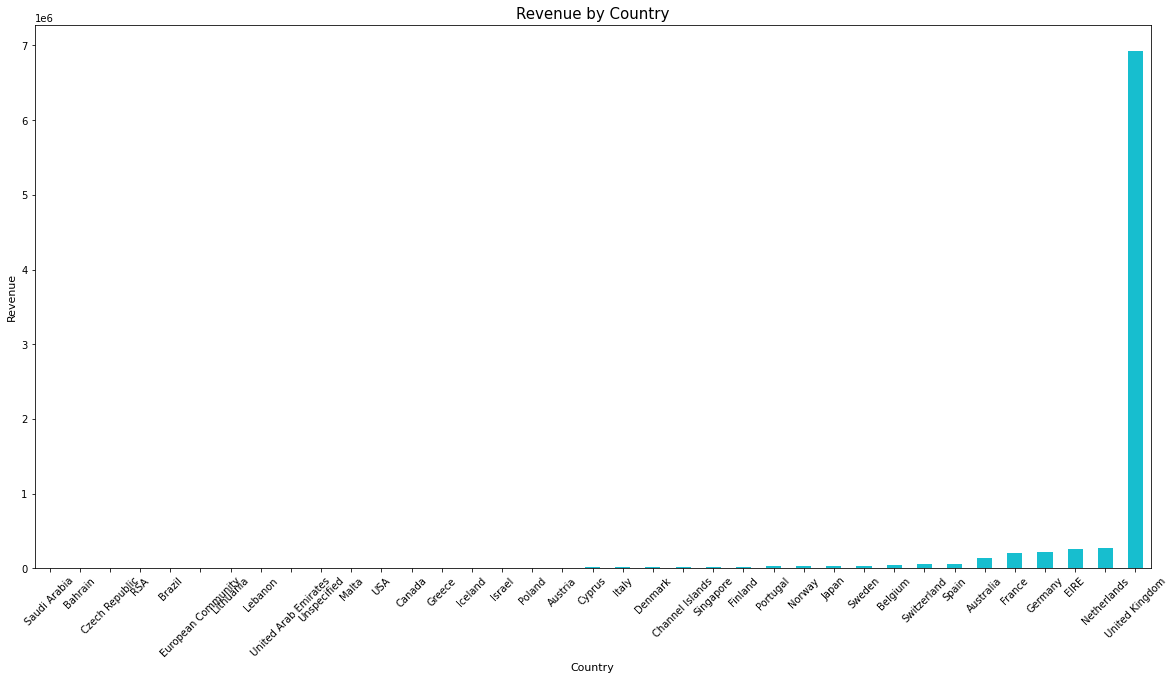

In [ ]:
# 시각화
plot = rev_by_countries.plot(kind = 'bar',color = COLORS[-1],figsize = (20,10))
plot.set_xlabel('Country',fontsize = 11)
plot.set_ylabel('Revenue',fontsize = 11)
plot.set_title('Revenue by Country',fontsize = 15)
plot.set_xticklabels(labels = rev_by_countries.index,rotation = 45)

In [ ]:
# 판매 비율 : (국가별 매출) / (총판매액)
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000017
Bahrain                 0.000065
Czech Republic          0.000097
RSA                     0.000118
Brazil                  0.000135
European Community      0.000153
Lithuania               0.000195
Lebanon                 0.000199
United Arab Emirates    0.000224
Unspecified             0.000314
Malta                   0.000321
USA                     0.000349
Canada                  0.000432
Greece                  0.000480
Iceland                 0.000481
Israel                  0.000850
Poland                  0.000863
Austria                 0.001120
Cyprus                  0.001600
Italy                   0.002034
Denmark                 0.002211
Channel Islands         0.002384
Singapore               0.002504
Finland                 0.002654
Portugal                0.003774
Norway                  0.003929
Japan                   0.004404
Sweden                  0.004489
Belgium                 0.004718
Switzerland             0.006643
Sp

In [ ]:
# 월별 매출
retail['InvoiceDate'].sort_values(ascending =True)

def extract_month(date): # 20110901
  month = str(date.month) # 201109
  if date.month < 10: # 1월 ~ 9월
    month = '0' + month # 09
  return str(date.year) + month # 201109

rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice'] 
print(rev_by_month)

201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     103258.660
Name: CheckoutPrice, dtype: float64


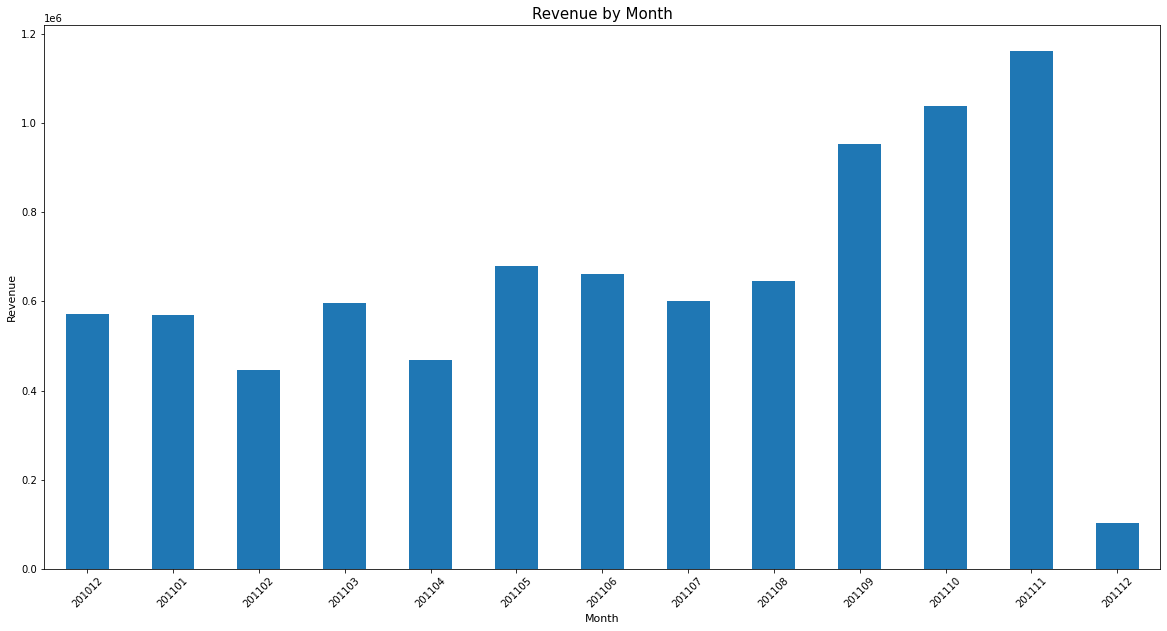

In [ ]:
def plot_bar(df,xlabel,ylabel,title,color = COLORS[0],figsize = (20,10),rotation = 45):
  plot = df.plot(kind = 'bar',color = color,figsize = figsize)
  plot.set_xlabel(xlabel,fontsize = 11)
  plot.set_ylabel(ylabel,fontsize = 11)
  plot.set_title(title,fontsize = 15)
  plot.set_xticklabels(labels = df.index,rotation = rotation)

plot_bar(rev_by_month,'Month','Revenue','Revenue by Month')

In [ ]:
# 요일별 매출
# 날짜.dayofweek(0: 월요일~6:일요일)

# 내 코드
def extract_day_of_week(date):
  dayofweek = str(date.dayofweek)
  return dayofweek

rev_by_dayofweek = retail.set_index('InvoiceDate').groupby(extract_day_of_week).sum()['CheckoutPrice']
print(rev_by_dayofweek)

0    1308944.201
1    1654490.591
2    1518981.960
3    1926339.660
4    1301568.121
6     786149.241
Name: CheckoutPrice, dtype: float64


In [ ]:
# 강사님 코드(람다 함수 활용)
rev_by_dayofweek = retail.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
print(rev_by_dayofweek)

0    1308944.201
1    1654490.591
2    1518981.960
3    1926339.660
4    1301568.121
6     786149.241
Name: CheckoutPrice, dtype: float64


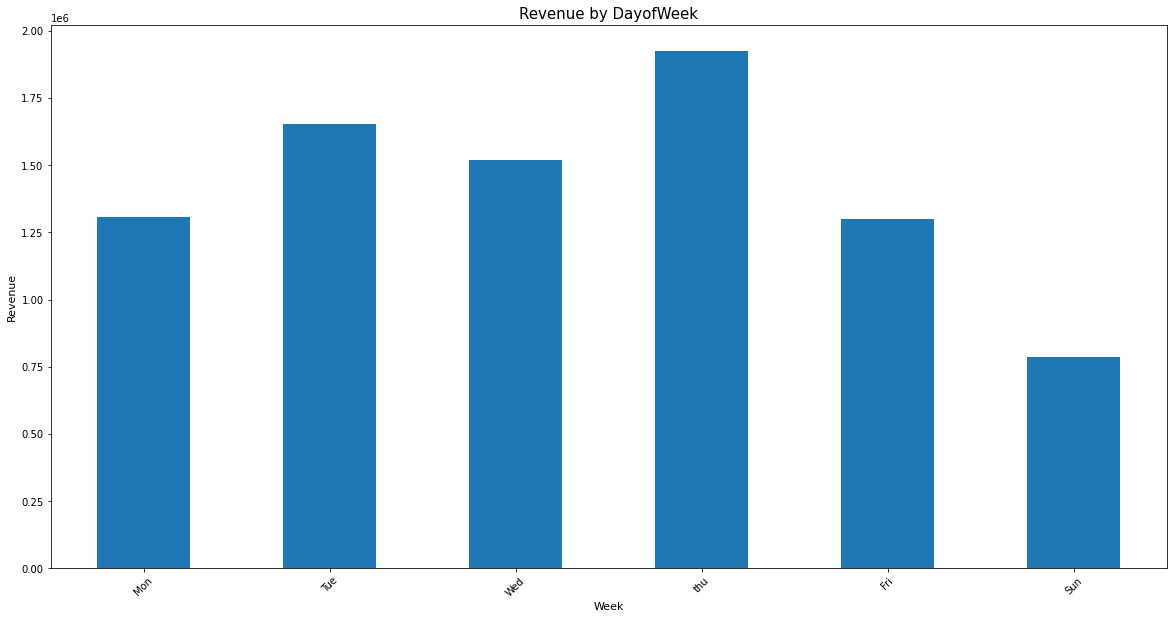

In [ ]:
# 시각화
DAY_OF_WEEK = np.array(['Mon','Tue','Wed','thu','Fri','Sat','Sun'])
rev_by_dayofweek.index = DAY_OF_WEEK[rev_by_dayofweek.index] # 인덱스 설정하기
plot_bar(rev_by_dayofweek,'Week','Revenue','Revenue by DayofWeek')

In [ ]:
# 시간대별 매출
# date.hour

def extract_hourofday(date):
  hourofday = str(date.hour)
  return hourofday

rev_by_hour = retail.set_index('InvoiceDate').groupby(extract_hourofday).sum()['CheckoutPrice']
print(rev_by_hour)

10    1242588.461
11    1088082.250
12    1325515.890
13    1150116.560
14     966471.741
15     934745.240
16     451928.780
17     220501.291
18      90333.790
19      48007.150
20      18871.210
6           4.250
7       31059.210
8      270562.170
9      657685.781
Name: CheckoutPrice, dtype: float64


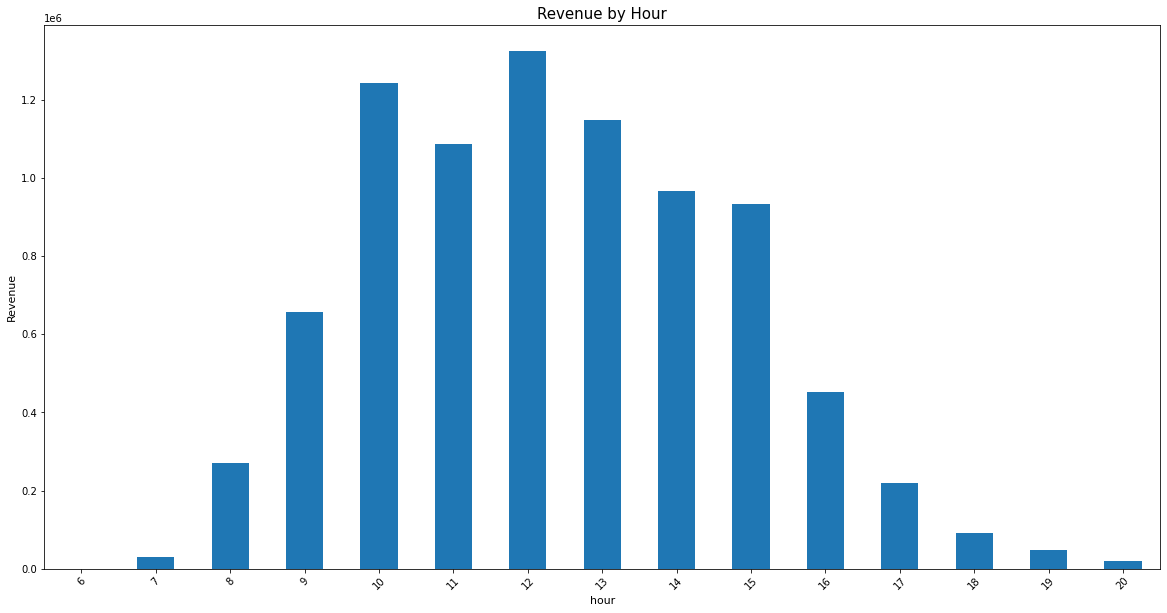

In [ ]:
# 강사님 코드(lambda 함수)
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date: date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour,'hour','Revenue','Revenue by Hour')

### **2-3. 매출에 대한 데이터 분석**
* 전체 매출의 82%가 UK에서 발생
* 가장 많은 주문이 발생한 달은 11월
* 11월의 판매량이 압도적으로 많음
* 일주일 중 목요일까지는 성장세, 이후에는 하락세(*토요일은 주문을 받지 않음)
* 7시에 주문 시작, 12시까지 증가세, 15시 이후 급락

### **2-4. TOP 10 매출 제품**


In [ ]:
# 제품 StockCode, 수량 Quantity, 매출 CheckoutPrice
# 가장 개수로 많이 팔린 제품, 가장 매출이 높은 제품 Top 10

# 내 코드(틀림)
quantity_top10 = retail.groupby('StockCode').sum()['Quantity']
df = pd.DataFrame(quantity_top10.head(10))
df

,Quantity
StockCode,
10002,823
10080,291
10120,193
10123C,5
10124A,16
10124G,17
10125,1206
10133,2384
10135,1900


In [ ]:
checkoutprice_top10 = retail.groupby('CheckoutPrice').sum()['Quantity']
df2 = pd.DataFrame(checkoutprice_top10.head(10))
df2

,Quantity
CheckoutPrice,
0.001,4
0.060,1
0.080,1
0.100,3
0.120,22
0.140,4
0.160,2
0.180,2
0.190,85


In [ ]:
# 강사님 코드

top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending = False)[:10] 
# 내림차순 정렬 -> 위에서부터 10개 자르기
print(top_selling)

top_revenue = retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending = False)[:10]
print(top_revenue)

StockCode
23166     77753
84077     53346
85099B    45775
22197     45316
85123A    36142
84879     34738
21212     33531
22492     25857
22616     24786
23084     24374
Name: Quantity, dtype: int32
StockCode
22423     138669.37
85123A     98891.86
85099B     84405.30
23166      81243.22
POST       75844.96
47566      68611.68
84879      55602.58
M          53352.47
22502      47366.20
23084      46063.56
Name: CheckoutPrice, dtype: float64


### **2-5. Top3 아이템의 월별 판매량 추이**


In [ ]:
monthly_top3 = retail.set_index('InvoiceDate').groupby(['StockCode',extract_month]).sum()[['Quantity','CheckoutPrice']].loc[top_selling.index[:3]]
monthly_top3

Quantity  CheckoutPrice
StockCode                                
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112        24          30.00
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112       294          85.26
85099B    201012      2056        3619.20
          201101      2625        4542.75
          201102      2971        5191.05
          201103      4924        8496.88
          201104      2211        4141.78
          201105      3470        6585.20
          201106      3529        6628.42
          201107      2970        5654.60
          201108      5278        9871.44
          201109      4177        7992.01
          201110      5237        9763.06
          201111      5678       10713.99
          201112       649        1204.92

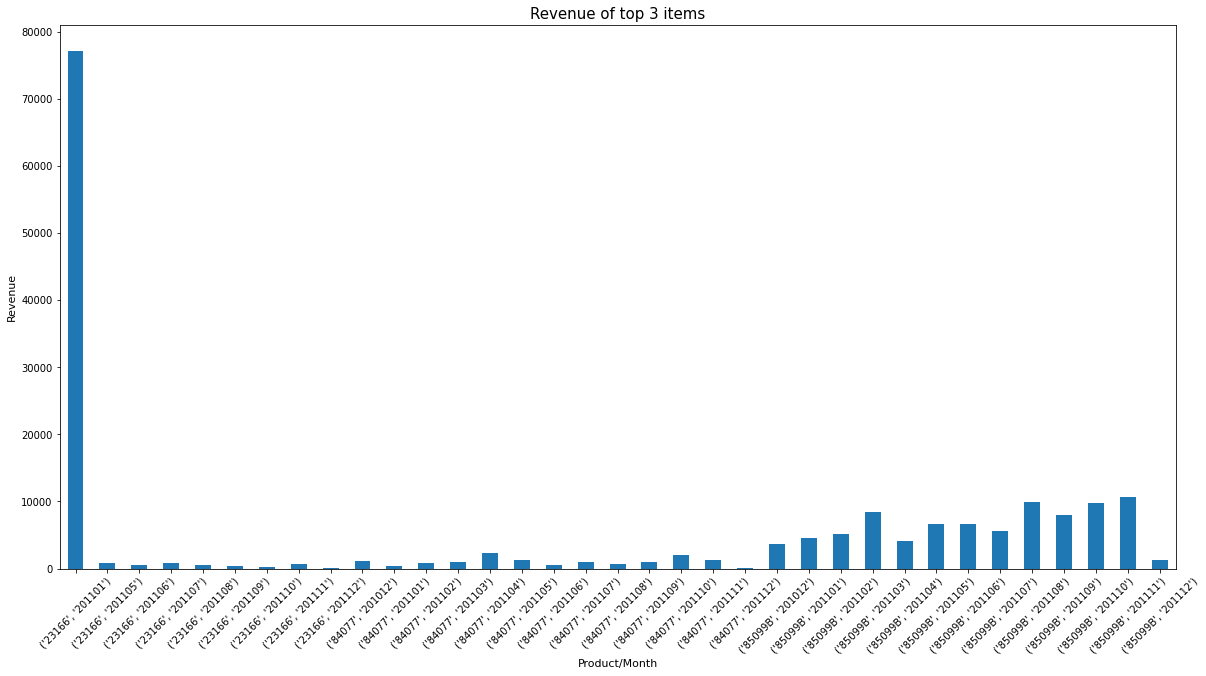

In [ ]:
plot_bar(monthly_top3['CheckoutPrice'],'Product/Month','Revenue','Revenue of top 3 items')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/파이썬기반AI프로젝트(4)/자료/OnlineRetailClean.csv'
data = pd.read_csv(filename,encoding = 'CP949')

In [ ]:
# 자료형 지정하기
dtypes = {
    'UnitPrice':np.float32,
    'CustomerId':np.int32,
    'Quantity':np.int32
}
retail = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/파이썬기반AI프로젝트(4)/자료/OnlineRetailClean.csv',dtype=dtypes)
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],infer_datetime_format= True)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# **3. 우수고객**


In [ ]:
# 구매 횟수 기준
retail.groupby('CustomerID').sum()['Quantity'].sort_values(ascending=False)[:10]

CustomerID
14646    196915
16446     80997
14911     80265
12415     77374
12346     74215
17450     69993
17511     64549
18102     64124
13694     63312
14298     58343
Name: Quantity, dtype: int32

In [ ]:
# 지불 금액 기준
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
12415    124914.53
14156    117379.63
17511     91062.38
16029     81024.84
12346     77183.60
Name: CheckoutPrice, dtype: float64

### **3-1. 사용자 기준으로 최초 구매한 월 연산하기**

In [ ]:
from datetime import datetime

# 구매 월(day는 무시)
# 2010-12-01 08:10:00 -> 2010-12-01
# 2010-12-10 10:00:00 -> 2010-12-01
def get_month_as_datetime(date):
  return datetime(date.year,date.month,1) # 구매한 날짜의 일을 모두 다 1일로 변경

retail['Month'] = retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [ ]:
month_group = retail.groupby('CustomerID')['Month']
retail['MonthStarted'] = month_group.transform(np.min)
retail.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


### **3-2. 기준이 되는 월과 실제 구매 월의 차이 계산하기**


In [ ]:
# 각 구매가 최초 구매로부터 얼마의 월이 지났는지 연산하기
# MonthPassed : 1(한달 지남)
# 실패
# 왜 12를 곱하는 지 다시 이해해보기! -> 연도가 2011년에서 2012년으로 넘어가는 것을 보환해주기 위함(달끼리 빼면 음수 나오는 것 고려)
retail['MonthPassed'] = (retail['Month'].dt.year - retail['MonthStarted'].dt.year) * 12 + (retail['Month'].dt.month - retail['MonthStarted'].dt.month)
retail.tail()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
397879,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
397880,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
397881,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397882,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
397883,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [ ]:
print(retail['Month'].dt.year)
print((retail['MonthStarted'].dt.year) * 12)

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
397879    2011
397880    2011
397881    2011
397882    2011
397883    2011
Name: Month, Length: 397884, dtype: int64
0         24120
1         24120
2         24120
3         24120
4         24120
          ...  
397879    24132
397880    24132
397881    24132
397882    24132
397883    24132
Name: MonthStarted, Length: 397884, dtype: int64
